In [1]:
# %load_ext autoreload
# %autoreload 2

# Set Trial Name

In [2]:
TRIAL_NAME = "18_add_matetial_info"

import datetime
import pytz
NOW = datetime.datetime.now(pytz.timezone('Asia/Tokyo')).strftime('%Y%m%d%H%M%S')

# Load yaml

In [3]:
import yaml
CONFIG_DIR = '../config'
with open(f'{CONFIG_DIR}/run000.yml') as file:
    cfg = yaml.safe_load(file)

import sys
sys.path.append(cfg['SRC_DIR'])
cfg['run_name'] = TRIAL_NAME

# fix seed

In [4]:
from util import seed_everything
seed_everything(seed=33, use_torch=False)

# Make Output Folder

In [5]:
import os
OUTPUT_DIR = f'../../output/{NOW}_{TRIAL_NAME}'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load Model

In [6]:
import pandas as pd
import numpy as np

sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')
color = pd.read_csv('../../data/color.csv')
historical_person = pd.read_csv('../../data/historical_person.csv')
maker = pd.read_csv('../../data/maker.csv')
material = pd.read_csv('../../data/material.csv')
object_collection = pd.read_csv('../../data/object_collection.csv')
palette = pd.read_csv('../../data/palette.csv')
principal_maker_occupation = pd.read_csv('../../data/principal_maker_occupation.csv')
principal_maker = pd.read_csv('../../data/principal_maker.csv')
production_place = pd.read_csv('../../data/production_place.csv')
technique = pd.read_csv('../../data/technique.csv')
test = pd.read_csv('../../data/test.csv')
test[cfg['target']] = np.nan
train = pd.read_csv('../../data/train.csv')

In [7]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [8]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,a2aabd3cc8859f4260ad,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,NaN,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,5d6a286cc3ab64c2c043,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,NaN,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


In [9]:
material

,object_id,name
0,000405d9a5e3f49fc49d,photographic paper
1,000405d9a5e3f49fc49d,cardboard
2,001020bd00b149970f78,oil paint (paint)
3,001020bd00b149970f78,panel
4,0011d6be41612ec9eae3,oil paint (paint)
...,...,...
35389,fffbe07b997bec00e203,photographic paper
35390,fffbe07b997bec00e203,cardboard
35391,fffd43b134ba7197d890,photographic paper
35392,ffff22ea12d7f99cff31,paper


# del_non_overlapping_list

In [10]:
del_non_overlapping_list = [
    # 'object_id',
    'art_series_id',
    #'title',
    #'description',
    #'long_title',
    'principal_maker',
    'principal_or_first_maker',
    #'sub_title',
    'copyright_holder',
    #'more_title',
    'acquisition_method',
    # 'acquisition_date',
    # 'acquisition_credit_line',
    # 'dating_presenting_date',
    # 'dating_sorting_date',
    'dating_period',
    # 'dating_year_early',
    # 'dating_year_late'
]

from util import replace_non_overlap_val_to_missing
train, test = replace_non_overlap_val_to_missing(train,test,columns=del_non_overlapping_list)

In [11]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,other,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,missing,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,other,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [12]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,other,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,missing,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,other,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,missing,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


# Merge Data

In [13]:
group = train.groupby('principal_maker')

agg_df = pd.concat([
    group.size().rename('size'), # 著者が何回出てくるか. (value_counts と同じです)
    group['sub_title'].nunique().rename('sub_title_num'), # 著者ごとに何種類の sub_title を持っているか
    group['dating_sorting_date'].agg(['min', 'max', 'mean']), # 著者ごとに描いた年度の最小・最大・平均 (agg に配列を渡すと同時に複数やってくれます)
], axis=1)

agg_df.head()

,size,sub_title_num,min,max,mean
principal_maker,,,,,
A. Böeseken,5,5,1858.0,1873.0,1865.8
A. Lutz,1,1,1825.0,1825.0,1825.0
A. Mansuy,2,2,1860.0,1860.0,1860.0
A. Nissen,3,1,1860.0,1860.0,1860.0
A. Roussel,1,1,1905.0,1905.0,1905.0


In [14]:
train = pd.merge(train, 
         agg_df,
         on='principal_maker', 
         how='left')

test = pd.merge(test, 
         agg_df,
         on='principal_maker', 
         how='left')

In [15]:
train.columns

Index(['object_id', 'art_series_id', 'title', 'description', 'long_title',
       'principal_maker', 'principal_or_first_maker', 'sub_title',
       'copyright_holder', 'more_title', 'acquisition_method',
       'acquisition_date', 'acquisition_credit_line', 'dating_presenting_date',
       'dating_sorting_date', 'dating_period', 'dating_year_early',
       'dating_year_late', 'likes', 'size', 'sub_title_num', 'min', 'max',
       'mean'],
      dtype='object')

# Feature Enginnering

In [16]:
def create_object_feature(input_df):        
    return input_df['likes'].copy()

create_object_feature(test).head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: likes, dtype: float64

In [17]:
def create_numeric_feature(input_df):
    use_columns = [
        'dating_period',
        'dating_year_early',
        'dating_year_late'
    ]

    return input_df[use_columns].copy()

create_numeric_feature(train).head(2)

,dating_period,dating_year_early,dating_year_late
0,17,1660.0,1685.0
1,19,1900.0,1930.0


In [18]:
def create_categorical_feature(input_df):
    use_columns = [
    'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    ]

    return input_df[use_columns].copy()

create_categorical_feature(train).head(2)

,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method
0,other,Jan Hackaert,Jan Hackaert,missing,purchase
1,other,Richard Tepe,Richard Tepe,erven Richard Tepe,purchase


In [19]:
def create_material_feature(input_df):    
    cross_material = pd.crosstab(material['object_id'], material['name']).reset_index()
    input_cross_material = pd.merge(input_df['object_id'], cross_material, on='object_id',how='left')
    return input_cross_material.iloc[:,1:].add_prefix('Materials_')

create_material_feature(test).head(2)

,Materials_China paper,Materials_Japanese paper (handmade paper),Materials_RC paper,Materials_acrylic paint,Materials_alloy,Materials_amalgam,Materials_asbestos,Materials_asbestos-cement,Materials_ball-point pens,Materials_baryta paper,...,Materials_textile materials,Materials_tin (metal),Materials_tin alloy,Materials_tracing paper,Materials_transparant paper,Materials_velvet (fabric weave),Materials_watercolor (paint),Materials_wax,Materials_wood (plant material),Materials_wood board
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import datetime

def create_acquisition_feature(input_df):
    out_df = pd.DataFrame()
    
    use_columns = [
        'acquisition_date'
    ]
    
    out_df['year'] = pd.to_datetime(input_df['acquisition_date']).dt.year
    out_df['month'] = pd.to_datetime(input_df['acquisition_date']).dt.month
    out_df['dayofweek'] = pd.to_datetime(input_df['acquisition_date']).dt.dayofweek
    out_df['sum_time'] =  10**10 - pd.to_datetime(input_df['acquisition_date']).view('int') // 10**9
    
    return out_df.add_prefix('AcquisitionDate_')

create_acquisition_feature(train).head(2)

,AcquisitionDate_year,AcquisitionDate_month,AcquisitionDate_dayofweek,AcquisitionDate_sum_time
0,1808.0,1.0,4.0,15112288000
1,2000.0,1.0,5.0,9053315200


In [21]:
def create_string_length_feature(input_df):
    out_df = pd.DataFrame()

    str_columns = [
        'title', 
        'long_title',
        'sub_title',
        'more_title'
        # and more
    ]

    for c in str_columns:
        out_df[c] = input_df[c].str.len()

    return out_df.add_prefix('StringLength__')

create_string_length_feature(train).head(2)

,StringLength__title,StringLength__long_title,StringLength__sub_title,StringLength__more_title
0,21,48,39.0,21.0
1,15,64,17.0,15.0


In [22]:
def create_count_encoding_feature(input_df):
    use_columns = [
        'acquisition_method',
        'title',
        'principal_maker',
        # and more
    ]

    out_df = pd.DataFrame()
    for column in use_columns:
        vc = train[column].value_counts()
        out_df[column] = input_df[column].map(vc)

    return out_df.add_prefix('CE_')

create_count_encoding_feature(train).head(2)

,CE_acquisition_method,CE_title,CE_principal_maker
0,4253,1,3
1,4253,1,180


In [23]:
def create_one_hot_encoding(input_df):
    use_columns = [
        'acquisition_method',
        'principal_maker'
    ]
    out_df = pd.DataFrame()
    for column in use_columns:

        # あまり巨大な行列にならないよう, 出現回数が 20 回を下回るカテゴリは考慮しない
        vc = train[column].value_counts()
        vc = vc[vc > 20]

        # 明示的に catgories を指定して, input_df によらず列の大きさが等しくなるようにする
        cat = pd.Categorical(input_df[column], categories=vc.index)

        # このタイミングで one-hot 化
        out_i = pd.get_dummies(cat)
        # column が Catgory 型として認識されているので list にして解除する (こうしないと concat でエラーになる)
        out_i.columns = out_i.columns.tolist()
        out_i = out_i.add_prefix(f'{column}=')
        out_df = pd.concat([out_df, out_i], axis=1)
    return out_df

create_one_hot_encoding(train).head(2)

,acquisition_method=purchase,acquisition_method=transfer,acquisition_method=gift,acquisition_method=unknown,acquisition_method=bequest,acquisition_method=loan,acquisition_method=missing,acquisition_method=nationalization 1795,principal_maker=anonymous,principal_maker=other,...,principal_maker=Rembrandt van Rijn,principal_maker=James Valentine,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Jan Banning,principal_maker=Adolphe Zimmermans,principal_maker=Cor Jaring,principal_maker=Jan Maurits Quinkhard,principal_maker=Augusta Curiel,principal_maker=Jean Baptiste August Kessler,principal_maker=Gerard Edelinck
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import re

#  h 166mm × w 78/54mm

def get_h_from_subtitle(text:str):
    match_cm = re.search(r'h \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'h \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100

def get_w_from_subtitle(text:str):
    match_cm = re.search(r'w \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'w \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        elif match_mm.group()[2:-2] == '78/54':
            return float(78)
        else:
            return float(match_mm.group()[2:-2])/100    

def get_t_from_subtitle(text:str):
    match_cm = re.search(r't \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r't \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100   

def get_d_from_subtitle(text:str):
    match_cm = re.search(r'd \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'd \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100   
        
def create_subtitle_info(input_df):
    out_df = pd.DataFrame()
     
    out_df['subtitle_h'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_h_from_subtitle(x))
    out_df['subtitle_w'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_w_from_subtitle(x))
    out_df['subtitle_t'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_t_from_subtitle(x))
    out_df['subtitle_d'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_d_from_subtitle(x))
    
    out_df['area'] = out_df['subtitle_h'] * out_df['subtitle_w']
    out_df['volume'] = out_df['subtitle_h'] * out_df['subtitle_w'] * out_df['subtitle_t']

    return out_df

create_subtitle_info(test).head(2)

,subtitle_h,subtitle_w,subtitle_t,subtitle_d,area,volume
0,1.67,1.08,NaN,NaN,1.8036,NaN
1,29.70,24.10,NaN,NaN,715.7700,NaN


In [25]:
# # train_emb_npy = np.load('../../extract_data/train_word_emb.npy')
# # test_emb_npy = np.load('../../extract_data/test_word_emb.npy')

# train_emb_npy = np.load('../../extract_data/train_description_emb_multilingual.npy')
# test_emb_npy = np.load('../../extract_data/test_description_emb_multilingual.npy')

# train_emb_df = pd.concat([train['object_id'], pd.DataFrame(train_emb_npy)],axis=1)
# test_emb_df = pd.concat([test['object_id'], pd.DataFrame(test_emb_npy)],axis=1)

# all_df = pd.concat([train_emb_df,test_emb_df],axis=0).reset_index(drop=True)

# all_df.to_pickle('../../extract_data/all_description_emb_multilingual.pkl')

In [26]:
from util import use_pca

def create_description_emb(input_df):
    out_df = pd.DataFrame()
    
    all_emb_df = pd.read_pickle('../../extract_data/all_description_emb_multilingual.pkl')
    
#     # 756 to 256
#     comp_num = 256

#     pca = PCA(n_components = comp_num)
#     pca_res = pca.fit_transform(all_emb_df.iloc[:,1:].values)
#     emb_df_256 = pd.DataFrame(pca_res, columns=[f'pca_{i}' for i in range(comp_num)])
#     all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1

    emb_df_256 = use_pca(all_emb_df.iloc[:,1:], 256)
    all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1)
    
    input_word_emb = pd.merge(input_df['object_id'], all_emb_df_256, on='object_id', how='left')
    
    # return input_word_emb[[num for num in range(768)]].add_prefix('DescriptionEmb_')
    return input_word_emb[[f'pca_{num}' for num in range(256)]].add_prefix('DescriptionEmb_')

create_description_emb(test).tail(2)

,DescriptionEmb_pca_0,DescriptionEmb_pca_1,DescriptionEmb_pca_2,DescriptionEmb_pca_3,DescriptionEmb_pca_4,DescriptionEmb_pca_5,DescriptionEmb_pca_6,DescriptionEmb_pca_7,DescriptionEmb_pca_8,DescriptionEmb_pca_9,...,DescriptionEmb_pca_246,DescriptionEmb_pca_247,DescriptionEmb_pca_248,DescriptionEmb_pca_249,DescriptionEmb_pca_250,DescriptionEmb_pca_251,DescriptionEmb_pca_252,DescriptionEmb_pca_253,DescriptionEmb_pca_254,DescriptionEmb_pca_255
12006,4.868668,-2.158478,0.022857,0.005380,-0.005051,-0.033197,-0.030381,0.001403,-0.000757,-0.003157,...,-0.000065,-0.000070,-0.000092,0.000011,0.000046,-0.000033,0.000201,0.000043,-0.000019,-0.000100
12007,-2.857192,-0.279424,-1.757070,-0.255253,-0.783499,-0.267255,-0.262804,-0.261662,0.870814,-0.289136,...,-0.002021,-0.026324,0.001770,-0.004371,0.023271,0.019867,0.020989,0.001674,0.005685,0.004983


In [27]:
# train_emb_npy = np.load('../../extract_data/train_word_emb.npy')
# test_emb_npy = np.load('../../extract_data/test_word_emb.npy')

# train_emb_npy = np.load('../../extract_data/train_description_emb_multilingual.npy')
# test_emb_npy = np.load('../../extract_data/test_description_emb_multilingual.npy')

train_emb_npy = np.load('../../extract_data/train_long_title_emb_multilingual.npy')
test_emb_npy = np.load('../../extract_data/test_long_title_emb_multilingual.npy')

train_emb_df = pd.concat([train['object_id'], pd.DataFrame(train_emb_npy)],axis=1)
test_emb_df = pd.concat([test['object_id'], pd.DataFrame(test_emb_npy)],axis=1)

all_df = pd.concat([train_emb_df,test_emb_df],axis=0).reset_index(drop=True)

all_df.to_pickle('../../extract_data/all_longtitle_emb_multilingual.pkl')

In [28]:
from util import use_pca

def create_longtitle_emb(input_df):
    out_df = pd.DataFrame()
    
    all_emb_df = pd.read_pickle('../../extract_data/all_longtitle_emb_multilingual.pkl')
    
#     # 756 to 256
#     comp_num = 256

#     pca = PCA(n_components = comp_num)
#     pca_res = pca.fit_transform(all_emb_df.iloc[:,1:].values)
#     emb_df_256 = pd.DataFrame(pca_res, columns=[f'pca_{i}' for i in range(comp_num)])
#     all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1

    emb_df_256 = use_pca(all_emb_df.iloc[:,1:], 256)
    all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1)
    
    input_word_emb = pd.merge(input_df['object_id'], all_emb_df_256, on='object_id', how='left')
    
    # return input_word_emb[[num for num in range(768)]].add_prefix('DescriptionEmb_')
    return input_word_emb[[f'pca_{num}' for num in range(256)]].add_prefix('LongTitleEmb_')

create_longtitle_emb(train).tail(2)

,LongTitleEmb_pca_0,LongTitleEmb_pca_1,LongTitleEmb_pca_2,LongTitleEmb_pca_3,LongTitleEmb_pca_4,LongTitleEmb_pca_5,LongTitleEmb_pca_6,LongTitleEmb_pca_7,LongTitleEmb_pca_8,LongTitleEmb_pca_9,...,LongTitleEmb_pca_246,LongTitleEmb_pca_247,LongTitleEmb_pca_248,LongTitleEmb_pca_249,LongTitleEmb_pca_250,LongTitleEmb_pca_251,LongTitleEmb_pca_252,LongTitleEmb_pca_253,LongTitleEmb_pca_254,LongTitleEmb_pca_255
12024,0.134985,0.274561,-0.355268,-0.568043,0.490873,-0.759762,0.800045,0.492067,-0.684613,-0.055676,...,-0.124085,-0.109650,0.011198,0.033917,-0.071648,0.004953,0.036293,-0.151615,0.046661,0.075901
12025,3.315138,0.391916,-0.387957,-0.729398,-0.963973,-1.700651,-0.560261,0.077447,0.027761,-0.265688,...,0.011082,-0.019668,0.018901,-0.077008,-0.060058,-0.031605,0.043291,0.041119,0.057007,0.006189


In [29]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [30]:
from tqdm import tqdm

def to_feature(input_df):
    """input_df を特徴量行列に変換した新しいデータフレームを返す.
    """

    processors = [
        create_object_feature,
        create_numeric_feature,
        create_categorical_feature,
        create_acquisition_feature,
        # create_principal_maker_info_feature,
        create_string_length_feature,
        create_count_encoding_feature,
        create_one_hot_encoding,
        create_subtitle_info,
        create_description_emb,
        create_longtitle_emb,
        create_material_feature
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)
        # 長さが等しいことをチェック (ずれている場合, func の実装がおかしい)
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

train_feat= to_feature(train)
test_feat = to_feature(test)

train = train_feat.copy()
test = test_feat.copy()

 55%|█████▍    | 6/11 [00:00<00:00, 58.96it/s]

createcreate_object_feature  0.001[s]
createcreate_numeric_feature  0.003[s]
createcreate_categorical_feature  0.003[s]
createcreate_acquisition_feature  0.036[s]
createcreate_string_length_feature  0.018[s]
createcreate_count_encoding_feature  0.013[s]
createcreate_one_hot_encoding  0.012[s]


 73%|███████▎  | 8/11 [00:00<00:00, 33.56it/s]

createcreate_subtitle_info  0.096[s]
createcreate_description_emb  1.147[s]


 91%|█████████ | 10/11 [00:02<00:00,  2.84it/s]

createcreate_longtitle_emb  1.027[s]


  0%|          | 0/11 [00:00<?, ?it/s]

createcreate_material_feature  0.308[s]
createcreate_object_feature  0.000[s]
createcreate_numeric_feature  0.002[s]
createcreate_categorical_feature  0.001[s]
createcreate_acquisition_feature  0.016[s]
createcreate_string_length_feature  0.019[s]
createcreate_count_encoding_feature  0.012[s]
createcreate_one_hot_encoding  0.010[s]


 73%|███████▎  | 8/11 [00:00<00:00, 44.77it/s]

createcreate_subtitle_info  0.085[s]
createcreate_description_emb  1.015[s]


 91%|█████████ | 10/11 [00:02<00:00,  3.05it/s]

createcreate_longtitle_emb  1.031[s]


100%|██████████| 11/11 [00:02<00:00,  4.22it/s]

createcreate_material_feature  0.305[s]


In [31]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# train

In [32]:
train.isnull().sum()

likes                                0
dating_period                        0
dating_year_early                   10
dating_year_late                    38
art_series_id                        0
                                  ... 
Materials_velvet (fabric weave)    219
Materials_watercolor (paint)       219
Materials_wax                      219
Materials_wood (plant material)    219
Materials_wood board               219
Length: 713, dtype: int64

In [33]:
test.head(2)

,likes,dating_period,dating_year_early,dating_year_late,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method,AcquisitionDate_year,...,Materials_textile materials,Materials_tin (metal),Materials_tin alloy,Materials_tracing paper,Materials_transparant paper,Materials_velvet (fabric weave),Materials_watercolor (paint),Materials_wax,Materials_wood (plant material),Materials_wood board
0,NaN,19,1850.0,1900.0,other,Bernardus Bruining,Bernardus Bruining,missing,transfer,1994.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,17,1609.0,1633.0,other,Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,missing,nationalization 1795,1798.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# reduce mem usage

In [34]:
# from util import reduce_mem_usage
# train_feat_df = reduce_mem_usage(train_feat_df)
# test_feat_df = reduce_mem_usage(test_feat_df)

# Lable Encoding

In [35]:
cat_col = train.select_dtypes('O').columns.tolist()

In [36]:
from fe import label_encode
train, test = label_encode(train, test, cat_col)

In [37]:
train.dtypes

likes                                int64
dating_period                        int64
dating_year_early                  float64
dating_year_late                   float64
art_series_id                        int64
                                    ...   
Materials_velvet (fabric weave)    float64
Materials_watercolor (paint)       float64
Materials_wax                      float64
Materials_wood (plant material)    float64
Materials_wood board               float64
Length: 713, dtype: object

# add fold

In [38]:
from fold import add_fold_bin_skf
train = add_fold_bin_skf(train, train[cfg['target']], fold_num=5, bins=[0,1,10,100,1000, 27392])

# Target Encoding

In [39]:
train['dating_period']

0        17
1        19
2        19
3        19
4        19
         ..
12021    19
12022    18
12023    18
12024    17
12025    15
Name: dating_period, Length: 12026, dtype: int64

In [40]:
target_enc_list = [
    # 'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    'dating_period'
]

from fe import target_encoding
train, test = target_encoding(train, 
                              test, 
                              target = cfg['target'], 
                              target_enc_list = target_enc_list, 
                              fold_num = cfg['fold_num']
                             )

principal_maker
principal_or_first_maker
copyright_holder
acquisition_method
dating_period


# Make Model

In [41]:
use_col = train.columns.tolist()
use_col.remove('fold')
use_col.remove(cfg['target'])

In [42]:
use_col

['dating_period',
 'dating_year_early',
 'dating_year_late',
 'art_series_id',
 'principal_maker',
 'principal_or_first_maker',
 'copyright_holder',
 'acquisition_method',
 'AcquisitionDate_year',
 'AcquisitionDate_month',
 'AcquisitionDate_dayofweek',
 'AcquisitionDate_sum_time',
 'StringLength__title',
 'StringLength__long_title',
 'StringLength__sub_title',
 'StringLength__more_title',
 'CE_acquisition_method',
 'CE_title',
 'CE_principal_maker',
 'acquisition_method=purchase',
 'acquisition_method=transfer',
 'acquisition_method=gift',
 'acquisition_method=unknown',
 'acquisition_method=bequest',
 'acquisition_method=loan',
 'acquisition_method=missing',
 'acquisition_method=nationalization 1795',
 'principal_maker=anonymous',
 'principal_maker=other',
 'principal_maker=Johann Sadeler (I)',
 'principal_maker=Bernard Picart',
 'principal_maker=Richard Tepe',
 'principal_maker=anoniem (Monumentenzorg)',
 'principal_maker=Jan Luyken',
 'principal_maker=Raphaël Sadeler (I)',
 'principa

In [43]:
# 学習直前でwandbにログイン、こうしないと頻繁にnotebookが落ちる
from use_wandb import use_wandb
use_wandb(params=cfg['params'], PROJECT_NAME=cfg['competition_name'], TRIAL_NAME=TRIAL_NAME)

wandb: Currently logged in as: sinchir0 (use `wandb login --relogin` to force relogin)


In [44]:
from fe import target_encoding
from lgbm import LGBM

lgbm = LGBM(train=train,
  test=test,
  target='likes',
  use_col=use_col,
  cat_col=cat_col,
  cfg=cfg,
  OUTPUT_DIR=OUTPUT_DIR,
  DO_FIT=True,
  DO_SEED_AVE=False,
  DEBUG=False,
  is_target_log=True)

feature_importance_df, order = lgbm.feature_importance(PLOT=False)

--------------FOLDS : 0 --------------


/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18618	valid_1's rmse: 1.22155
[200]	training's rmse: 1.02508	valid_1's rmse: 1.10422
[300]	training's rmse: 0.955428	valid_1's rmse: 1.07495
[400]	training's rmse: 0.904701	valid_1's rmse: 1.06214
[500]	training's rmse: 0.862449	valid_1's rmse: 1.0543
[600]	training's rmse: 0.82562	valid_1's rmse: 1.04944
[700]	training's rmse: 0.792171	valid_1's rmse: 1.04458
[800]	training's rmse: 0.761593	valid_1's rmse: 1.04091
[900]	training's rmse: 0.73348	valid_1's rmse: 1.03791
[1000]	training's rmse: 0.707125	valid_1's rmse: 1.03527
[1100]	training's rmse: 0.682331	valid_1's rmse: 1.03285
[1200]	training's rmse: 0.659414	valid_1's rmse: 1.0311
[1300]	training's rmse: 0.637936	valid_1's rmse: 1.02985
[1400]	training's rmse: 0.61743	valid_1's rmse: 1.02813
[1500]	training's rmse: 0.59828	valid_1's rmse: 1.02671
[1600]	training's rmse: 0.580079	valid_1's rmse: 1.02537
[1700]	training's rmse: 0.562924	valid_1's 

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18005	valid_1's rmse: 1.22318
[200]	training's rmse: 1.01777	valid_1's rmse: 1.1134
[300]	training's rmse: 0.947957	valid_1's rmse: 1.08903
[400]	training's rmse: 0.89865	valid_1's rmse: 1.0783
[500]	training's rmse: 0.856634	valid_1's rmse: 1.0716
[600]	training's rmse: 0.819179	valid_1's rmse: 1.06607
[700]	training's rmse: 0.785872	valid_1's rmse: 1.06177
[800]	training's rmse: 0.755272	valid_1's rmse: 1.05838
[900]	training's rmse: 0.727272	valid_1's rmse: 1.055
[1000]	training's rmse: 0.701204	valid_1's rmse: 1.0527
[1100]	training's rmse: 0.676228	valid_1's rmse: 1.05114
[1200]	training's rmse: 0.653102	valid_1's rmse: 1.04935
[1300]	training's rmse: 0.631748	valid_1's rmse: 1.04828
[1400]	training's rmse: 0.611498	valid_1's rmse: 1.04645
[1500]	training's rmse: 0.592421	valid_1's rmse: 1.04572
[1600]	training's rmse: 0.574471	valid_1's rmse: 1.04473
[1700]	training's rmse: 0.557107	valid_1's r

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18617	valid_1's rmse: 1.21302
[200]	training's rmse: 1.02615	valid_1's rmse: 1.10026
[300]	training's rmse: 0.957274	valid_1's rmse: 1.07092
[400]	training's rmse: 0.907453	valid_1's rmse: 1.0559
[500]	training's rmse: 0.865266	valid_1's rmse: 1.04739
[600]	training's rmse: 0.827284	valid_1's rmse: 1.04146
[700]	training's rmse: 0.793701	valid_1's rmse: 1.0374
[800]	training's rmse: 0.762734	valid_1's rmse: 1.03356
[900]	training's rmse: 0.734507	valid_1's rmse: 1.03039
[1000]	training's rmse: 0.708171	valid_1's rmse: 1.02768
[1100]	training's rmse: 0.683364	valid_1's rmse: 1.02623
[1200]	training's rmse: 0.660168	valid_1's rmse: 1.02473
[1300]	training's rmse: 0.638625	valid_1's rmse: 1.0238
[1400]	training's rmse: 0.618189	valid_1's rmse: 1.02264
[1500]	training's rmse: 0.598733	valid_1's rmse: 1.02145
[1600]	training's rmse: 0.580281	valid_1's rmse: 1.01985
[1700]	training's rmse: 0.562876	valid_1

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18047	valid_1's rmse: 1.23579
[200]	training's rmse: 1.01794	valid_1's rmse: 1.12948
[300]	training's rmse: 0.948107	valid_1's rmse: 1.10124
[400]	training's rmse: 0.897672	valid_1's rmse: 1.08802
[500]	training's rmse: 0.855424	valid_1's rmse: 1.07912
[600]	training's rmse: 0.81816	valid_1's rmse: 1.0721
[700]	training's rmse: 0.784434	valid_1's rmse: 1.06668
[800]	training's rmse: 0.753753	valid_1's rmse: 1.06264
[900]	training's rmse: 0.725695	valid_1's rmse: 1.05869
[1000]	training's rmse: 0.699043	valid_1's rmse: 1.05574
[1100]	training's rmse: 0.674577	valid_1's rmse: 1.0532
[1200]	training's rmse: 0.65188	valid_1's rmse: 1.0509
[1300]	training's rmse: 0.63054	valid_1's rmse: 1.04819
[1400]	training's rmse: 0.61017	valid_1's rmse: 1.0469
[1500]	training's rmse: 0.591105	valid_1's rmse: 1.04568
[1600]	training's rmse: 0.572731	valid_1's rmse: 1.04442
[1700]	training's rmse: 0.555538	valid_1's rm

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18384	valid_1's rmse: 1.23159
[200]	training's rmse: 1.02393	valid_1's rmse: 1.11311
[300]	training's rmse: 0.954113	valid_1's rmse: 1.08165
[400]	training's rmse: 0.903869	valid_1's rmse: 1.06759
[500]	training's rmse: 0.861716	valid_1's rmse: 1.05729
[600]	training's rmse: 0.824014	valid_1's rmse: 1.05011
[700]	training's rmse: 0.790126	valid_1's rmse: 1.04493
[800]	training's rmse: 0.759475	valid_1's rmse: 1.04031
[900]	training's rmse: 0.73106	valid_1's rmse: 1.03626
[1000]	training's rmse: 0.704678	valid_1's rmse: 1.03314
[1100]	training's rmse: 0.67978	valid_1's rmse: 1.03104
[1200]	training's rmse: 0.656911	valid_1's rmse: 1.02901
[1300]	training's rmse: 0.63517	valid_1's rmse: 1.02757
[1400]	training's rmse: 0.614769	valid_1's rmse: 1.02621
[1500]	training's rmse: 0.595584	valid_1's rmse: 1.02495
[1600]	training's rmse: 0.577259	valid_1's rmse: 1.02402
[1700]	training's rmse: 0.559875	valid_1

In [45]:
os.makedirs(f"{OUTPUT_DIR}/imp", exist_ok=True)
feature_importance_df[order[:50]].to_csv(f"{OUTPUT_DIR}/imp/importance.csv")
display(feature_importance_df[order[:50]])

,Materials_oil paint (paint),subtitle_h,principal_maker,principal_or_first_maker,principal_or_first_maker_target_enc,principal_maker_target_enc,subtitle_w,area,dating_year_early,StringLength__more_title,...,DescriptionEmb_pca_19,DescriptionEmb_pca_9,DescriptionEmb_pca_40,LongTitleEmb_pca_243,LongTitleEmb_pca_34,LongTitleEmb_pca_65,dating_period_target_enc,LongTitleEmb_pca_12,LongTitleEmb_pca_116,LongTitleEmb_pca_129
fold_0,381425.840290,113715.868814,33890.482938,23632.726038,26133.461398,21416.073811,39423.526578,8455.470369,10235.368091,5710.905072,...,1797.960708,1519.994689,1450.977643,1302.818870,2498.736905,1568.071536,2945.778298,2082.095545,2126.382002,1774.774864
fold_1,385224.105854,121682.412588,31936.027754,25950.941943,26548.316082,21765.999505,17840.212709,16111.773963,10117.022791,9321.853925,...,2095.776926,1221.266370,1856.583652,969.092092,2320.839837,1712.092199,3476.651634,3331.953100,2488.956059,1566.107405
fold_2,382659.180801,125994.631018,29458.894362,27370.186717,27617.910419,21329.965445,20964.371150,13296.972270,10154.601288,7232.104453,...,1058.229111,1161.261833,1404.340629,825.909218,2413.773452,1444.362768,2976.627976,2118.800694,2102.636316,1333.869488
fold_3,399813.141748,114470.132810,33591.159268,27535.687121,23908.618173,20391.338408,20311.511118,13797.533087,8575.017874,7067.318245,...,1757.040205,1550.622026,2929.595549,952.364449,2286.025881,1666.569287,2934.685982,1429.740670,1942.395286,1636.071343
fold_4,375357.932938,130689.321897,33347.706144,28544.279435,24478.427174,20140.706892,17977.567725,15741.843080,11112.285611,8676.179080,...,1939.262892,1935.742350,1923.200215,1893.831306,1860.482029,1836.350708,1832.469934,1818.747030,1815.572136,1812.486637


In [46]:
from make_data import make_oof
oof_df = make_oof(OUTPUT_DIR=OUTPUT_DIR, TARGET=cfg['target'])

In [47]:
# from score import calc_macro_auc
# score = calc_macro_auc(train_target_df=train_target_df, oof_df=oof_df, order_list=TARGET_IDS)

In [48]:
sample_sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')

In [49]:
from make_data import make_sub
sub_df = make_sub(sample_sub=sample_sub, TARGET_NAME=cfg['target'], TRIAL_NAME=TRIAL_NAME, OUTPUT_DIR=OUTPUT_DIR, cv_score=lgbm.score)

QUick Sub
sh sub.sh output/20210308073903_18_add_matetial_info/pred/pred_likes_1.0261.csv


In [50]:
sub_df.describe()

,likes
count,12008.000000
mean,21.283078
std,64.941589
min,0.000000
25%,1.018013
50%,2.373926
75%,6.175473
max,1784.214222


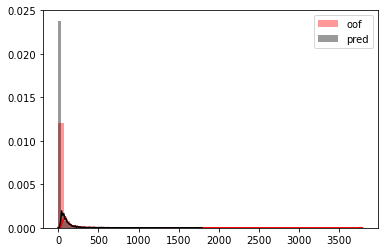

In [51]:
from make_fig import make_dist_oof_pred
make_dist_oof_pred(oof_df=oof_df,sub_df=sub_df,OUTPUT_DIR=OUTPUT_DIR)